### Predicting Stock Behavior for Health Insurnace Competitors

Used the following tutorials: 
https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a
https://github.com/sajal2692/data-science-portfolio/blob/master/Stock%20Market%20Analysis%20for%20Tech%20Stocks.ipynb
https://www.investopedia.com/articles/07/montecarlo.asp


### Import Libraries

In [1]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime
import yfinance as yf

#To handle floats in Python 2
from __future__ import division

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from pandas_datareader import DataReader
from dateutil.relativedelta import *

In [2]:
stock_list = ['HUM','ANTM', 'UNH']

In [3]:
import datetime
from dateutil.relativedelta import *

end_date = datetime.datetime.now() + datetime.timedelta(seconds = 60 * 3.4)
start_date=end_date + relativedelta(years=-1)

In [4]:
#Using Yahoo Finance
for stock in stock_list:
    globals()[stock] = DataReader(stock,'yahoo',start_date,end_date)

### What's the change in stock's price over time?

<Figure size 1080x720 with 0 Axes>

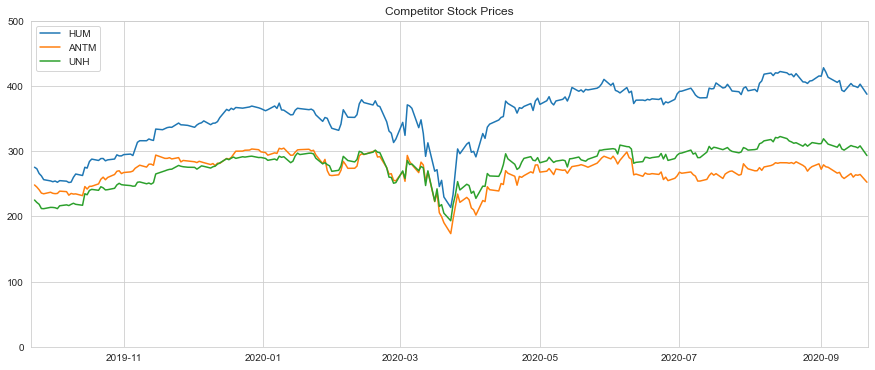

<Figure size 1080x720 with 0 Axes>

In [5]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(15,6))
HUM_lines = ax.plot(HUM['Adj Close'])
ANTM_lines = ax.plot(ANTM['Adj Close'])
UNH_lines = ax.plot(UNH['Adj Close'])

ax.legend(['HUM', 'ANTM', 'UNH'])
ax.set(xlim=(start_date, end_date), ylim=(0, 500))
plt.title("Competitor Stock Prices")
plt.figure(figsize=(15,10))

#### All 3 stocks had a dip in March when COVID affected the stock market

### Moving Averages - 30, 60, 90 Days

In [6]:
days = [30,60,90]

for moving_average in days:
    column_name = "MA %s days" %(str(moving_average))
    HUM[column_name] = HUM['Adj Close'].rolling(window=moving_average,center=False).mean()
    ANTM[column_name] = ANTM['Adj Close'].rolling(window=moving_average,center=False).mean()
    UNH[column_name] = UNH['Adj Close'].rolling(window=moving_average,center=False).mean()

In [7]:
print("Humana Moving Average")
print(HUM.tail(5))

print("Anthem Moving Average")
print(ANTM.tail(5))

print("UnitedHealth Group Moving Average")
print(UNH.
      tail(5))

Humana Moving Average
                  High         Low        Open       Close     Volume  \
Date                                                                    
2020-09-15  407.000000  398.609985  404.739990  399.989990   509400.0   
2020-09-16  406.089996  398.640015  403.480011  399.070007   420400.0   
2020-09-17  399.299988  391.519989  396.339996  397.500000   559200.0   
2020-09-18  405.510010  397.029999  397.899994  402.630005  1275300.0   
2020-09-21  392.940002  383.209991  393.959991  387.165009   265809.0   

             Adj Close  MA 30 days  MA 60 days  MA 90 days  
Date                                                        
2020-09-15  399.989990  411.034667  400.360778  396.616100  
2020-09-16  399.070007  411.297667  400.692339  396.862764  
2020-09-17  397.500000  411.084001  400.964954  397.063809  
2020-09-18  402.630005  410.917334  401.489126  397.281144  
2020-09-21  387.165009  409.891501  401.683501  397.396418  
Anthem Moving Average
                 

### Plot the Moving Averages

<Figure size 1080x720 with 0 Axes>

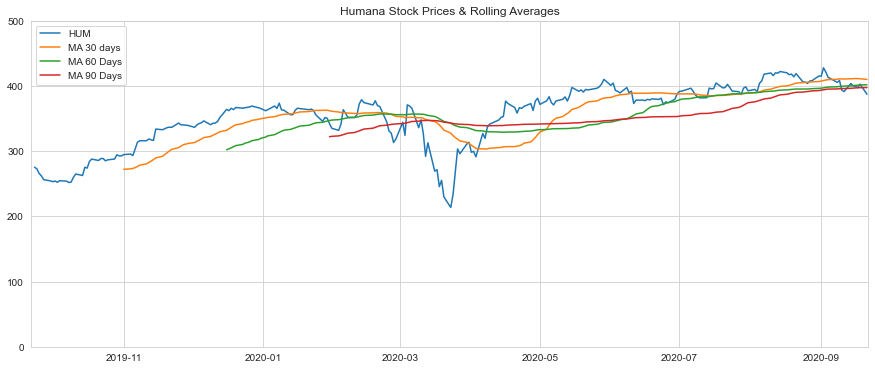

<Figure size 1080x720 with 0 Axes>

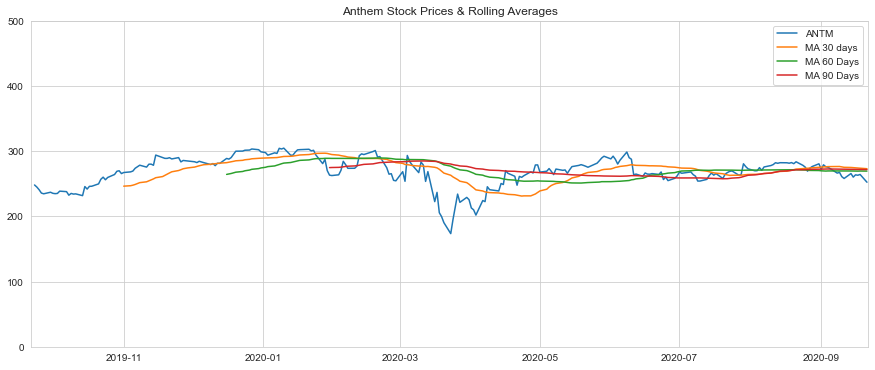

<Figure size 1080x720 with 0 Axes>

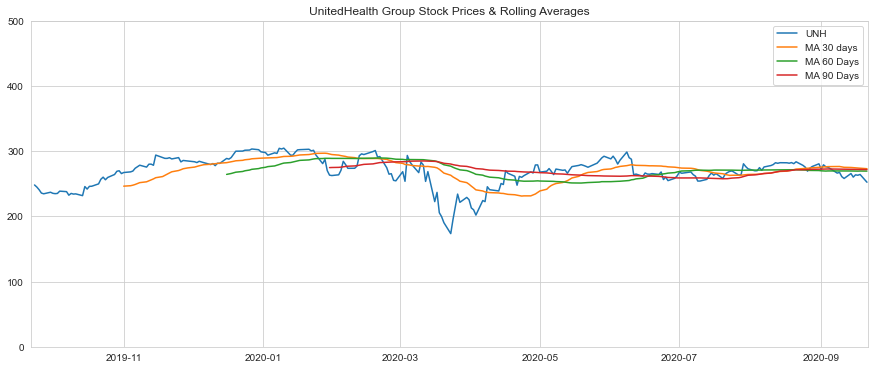

<Figure size 1080x720 with 0 Axes>

In [8]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(15,6))
HUM_lines = ax.plot(HUM[['Adj Close','MA 30 days', 'MA 60 days','MA 90 days']])

ax.legend(['HUM', 'MA 30 days', 'MA 60 Days', 'MA 90 Days'])
ax.set(xlim=(start_date, end_date), ylim=(0, 500))
plt.title("Humana Stock Prices & Rolling Averages")
plt.figure(figsize=(15,10))

fig, ax = plt.subplots(figsize=(15,6))
HUM_lines = ax.plot(ANTM[['Adj Close','MA 30 days','MA 60 days','MA 90 days']])

ax.legend(['ANTM', 'MA 30 days', 'MA 60 Days', 'MA 90 Days'])
ax.set(xlim=(start_date, end_date), ylim=(0, 500))
plt.title("Anthem Stock Prices & Rolling Averages")
plt.figure(figsize=(15,10))

fig, ax = plt.subplots(figsize=(15,6))
HUM_lines = ax.plot(ANTM[['Adj Close','MA 30 days','MA 60 days','MA 90 days']])

ax.legend(['UNH', 'MA 30 days', 'MA 60 Days', 'MA 90 Days'])
ax.set(xlim=(start_date, end_date), ylim=(0, 500))
plt.title("UnitedHealth Group Stock Prices & Rolling Averages")
plt.figure(figsize=(15,10))

### Daily Return

The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price.

In [9]:
#The daily return column can be created by using the percentage change over the adjusted closing price
HUM['Daily Return'] = HUM['Adj Close'].pct_change()
ANTM['Daily Return'] = ANTM['Adj Close'].pct_change()
UNH['Daily Return'] = UNH['Adj Close'].pct_change()

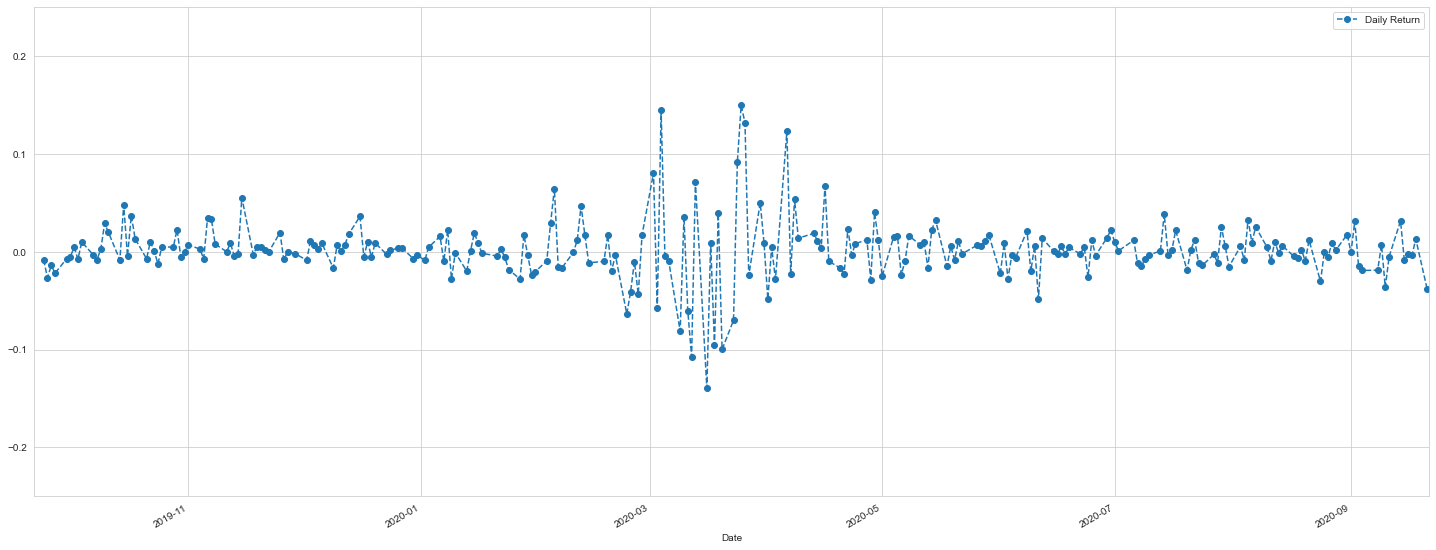

In [10]:
#Plotting the daily return
HUM['Daily Return'].plot(figsize=(25,10),legend=True,linestyle='--',marker='o', ylim=(-.25, .25), xlim=(start_date, end_date))

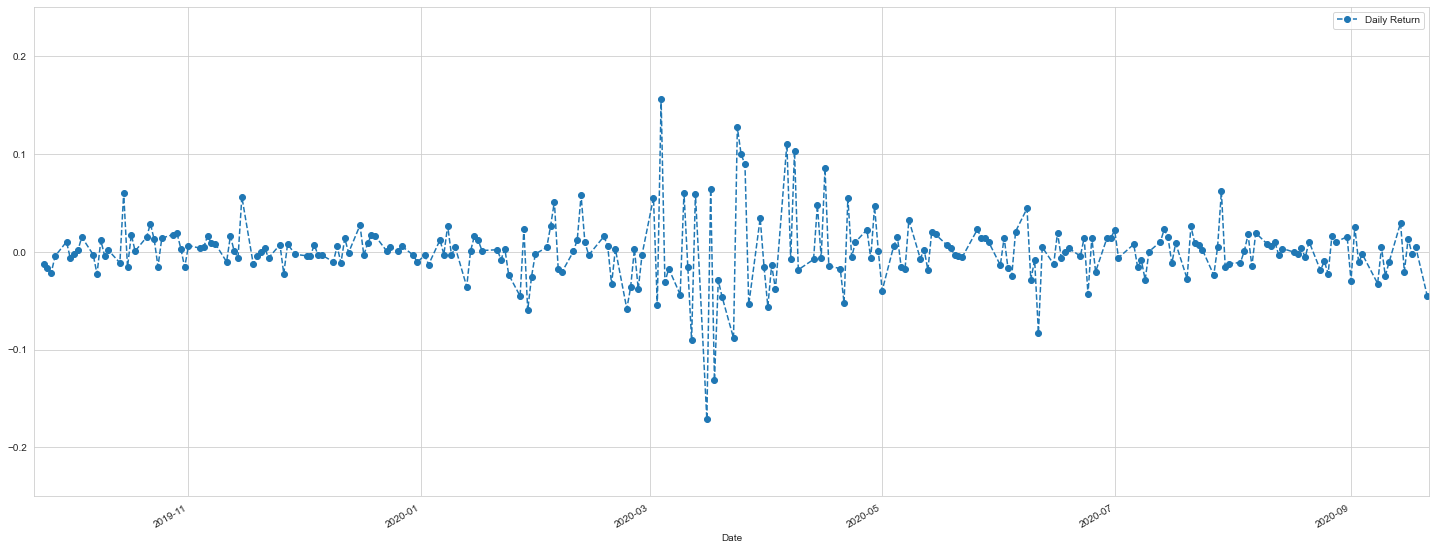

In [11]:
#Plotting the daily return
ANTM['Daily Return'].plot(figsize=(25,10),legend=True,linestyle='--',marker='o', ylim=(-.25, .25), xlim=(start_date, end_date))

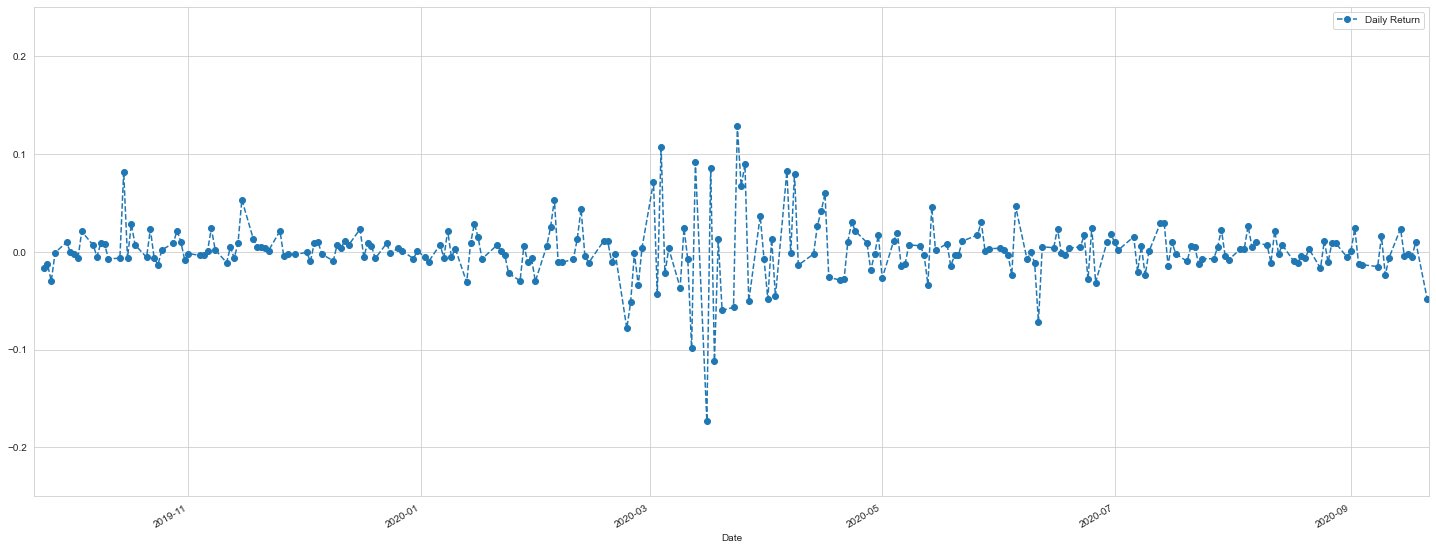

In [12]:
#Plotting the daily return
UNH['Daily Return'].plot(figsize=(25,10),legend=True,linestyle='--',marker='o', ylim=(-.25, .25), xlim=(start_date, end_date))

All 3 stocks showed instability March - May 2020 during COVID stock fluctions.  

### What was the correlation between the three stocks?

In [13]:
#Reading just the 'Adj Close'
adjusted_close = DataReader(stock_list,'yahoo',start_date,end_date)['Adj Close']
adjusted_close.tail(10)

Symbols,HUM,ANTM,UNH
Date,,,
2020-09-08,405.369995,266.260010,305.989136
2020-09-09,408.220001,267.420013,310.739532
2020-09-10,393.369995,260.839996,303.350006
2020-09-11,391.359985,258.029999,301.480011
2020-09-14,403.630005,265.600006,308.570007
2020-09-15,399.989990,260.149994,307.230011
2020-09-16,399.070007,263.619995,306.519989
2020-09-17,397.500000,263.000000,304.980011
2020-09-18,402.630005,264.190002,308.019989


In [14]:
returns = adjusted_close.pct_change()

In [15]:
returns.tail(10)

Symbols,HUM,ANTM,UNH
Date,,,
2020-09-08,-0.018926,-0.032619,-0.015224
2020-09-09,0.007031,0.004357,0.015525
2020-09-10,-0.036377,-0.024606,-0.023780
2020-09-11,-0.005110,-0.010773,-0.006164
2020-09-14,0.031352,0.029338,0.023517
2020-09-15,-0.009018,-0.020520,-0.004343
2020-09-16,-0.002300,0.013338,-0.002311
2020-09-17,-0.003934,-0.002352,-0.005024
2020-09-18,0.012906,0.004525,0.009968


### Plot daily reutrn relationships between competitors

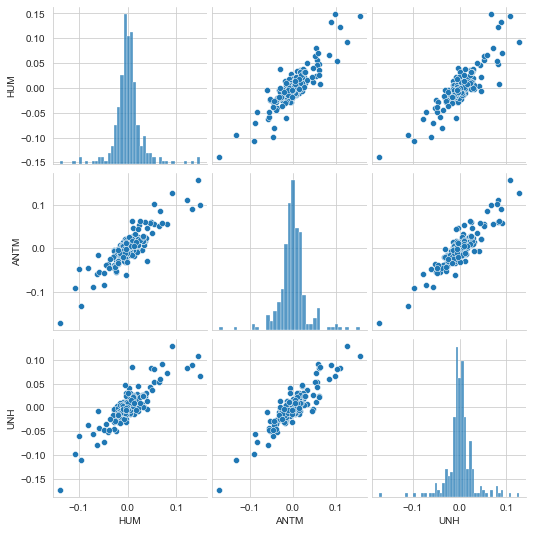

In [16]:
sns.pairplot(returns.dropna())

There is a positive daily return correlation for each of these stocks

### Predicting behavior using Monte Carlo Method. 

Formulas taken from this website: https://github.com/sajal2692/data-science-portfolio/blob/master/Stock%20Market%20Analysis%20for%20Tech%20Stocks.ipynb

In [17]:
days = 365
delta = 1/365
HUM_mu = returns.mean()['HUM']
HUM_sigma = returns.std()['HUM']
ANTM_mu = returns.mean()['ANTM']
ANTM_sigma = returns.std()['ANTM']
UNH_mu = returns.mean()['UNH']
UNH_sigma = returns.std()['UNH']

In [18]:
#Function takes in stock price, number of days, mean, and STD
def stock_monte_carlo(start_price,days,mu,sigma):
    
    #Initalize the arrays
    price = np.zeros(days)
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    price[0] = start_price
        
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*delta,scale=sigma*np.sqrt(delta))
        
        drift[x] = mu * delta
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [19]:
HUM.head()

,High,Low,Open,Close,Volume,Adj Close,MA 30 days,MA 60 days,MA 90 days,Daily Return
Date,,,,,,,,,,
2019-09-23,279.010010,274.079987,275.670013,277.299988,744700.0,275.270569,NaN,NaN,NaN,NaN
2019-09-24,279.250000,273.559998,277.869995,274.970001,700900.0,272.957611,NaN,NaN,NaN,-0.008402
2019-09-25,277.420013,265.179993,274.589996,267.690002,1660600.0,265.730896,NaN,NaN,NaN,-0.026476
2019-09-26,268.649994,258.420013,268.100006,263.920013,2324100.0,261.988525,NaN,NaN,NaN,-0.014083
2019-09-27,266.970001,256.619995,264.529999,257.589996,1092100.0,256.238831,NaN,NaN,NaN,-0.021946


In [20]:
HUM_start_price = 275.67 #Taken from oldest open record above.

In [21]:
ANTM.head()

,High,Low,Open,Close,Volume,Adj Close,MA 30 days,MA 60 days,MA 90 days,Daily Return
Date,,,,,,,,,,
2019-09-23,252.429993,249.360001,250.850006,251.399994,1250400.0,248.093124,NaN,NaN,NaN,NaN
2019-09-24,252.970001,246.169998,252.619995,248.190002,1889800.0,244.925369,NaN,NaN,NaN,-0.012768
2019-09-25,250.470001,243.970001,247.690002,244.000000,1526200.0,240.790466,NaN,NaN,NaN,-0.016882
2019-09-26,244.770004,235.449997,243.789993,238.800003,2310100.0,235.658875,NaN,NaN,NaN,-0.021311
2019-09-27,241.470001,237.100006,240.270004,237.690002,1148700.0,234.563477,NaN,NaN,NaN,-0.004648


In [22]:
ANTM_start_price = 250.85 #Taken from oldest open record above.

In [23]:
UNH.head()

,High,Low,Open,Close,Volume,Adj Close,MA 30 days,MA 60 days,MA 90 days,Daily Return
Date,,,,,,,,,,
2019-09-23,230.779999,228.320007,229.770004,228.770004,3281200.0,225.010696,NaN,NaN,NaN,NaN
2019-09-24,229.839996,222.919998,229.380005,225.000000,5006800.0,221.302628,NaN,NaN,NaN,-0.016480
2019-09-25,226.500000,222.130005,224.279999,222.169998,4658000.0,218.519150,NaN,NaN,NaN,-0.012578
2019-09-26,223.630005,213.429993,223.039993,215.479996,10444400.0,211.939072,NaN,NaN,NaN,-0.030112
2019-09-27,218.880005,215.020004,218.179993,215.259995,4834900.0,211.722687,NaN,NaN,NaN,-0.001021


In [24]:
UNH_start_price = 229.77 #Taken from oldest open record above.

In [25]:
runs = 10000
HUM_simulations = np.zeros(runs)
ANTM_simulations = np.zeros(runs)
UNH_simulations = np.zeros(runs)

for run in range(runs):
    HUM_simulations[run] = stock_monte_carlo(HUM_start_price,days,HUM_mu,HUM_sigma)[days-1]  

for run in range(runs):
    ANTM_simulations[run] = stock_monte_carlo(ANTM_start_price,days,ANTM_mu,ANTM_sigma)[days-1]  

for run in range(runs):
    UNH_simulations[run] = stock_monte_carlo(UNH_start_price,days,UNH_mu,UNH_sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Humana Stock after 365 days')

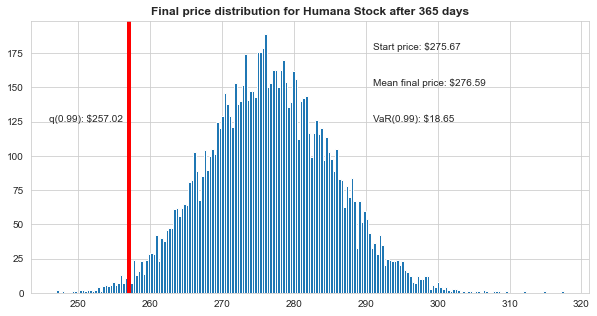

In [26]:
HUMq = np.percentile(HUM_simulations,1)

plt.figure(figsize=(10,5))
plt.hist(HUM_simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f" %HUM_start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % HUM_simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (HUM_start_price -HUMq,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % HUMq)
plt.axvline(x=HUMq, linewidth=4, color='r')
plt.title(u"Final price distribution for Humana Stock after %s days" %days, weight='bold')

In [27]:
print("The starting price that we had was $" + str(HUM_start_price)  
      + ". The average final price over 10,000 runs was $" + str(round(HUM_simulations.mean(),2)))
print("For every stock, we'd be risking $" + str(round((HUM_start_price -HUMq),2)) + " 99% of the time.")

The starting price that we had was $275.67. The average final price over 10,000 runs was $276.59
For every stock, we'd be risking $18.65 99% of the time.


Text(0.5, 1.0, 'Final price distribution for Anthem Stock after 365 days')

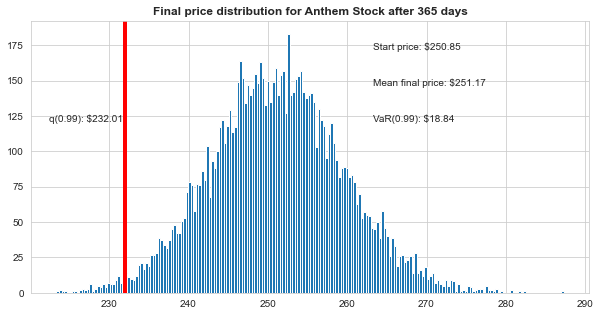

In [28]:
ANTMq = np.percentile(ANTM_simulations,1)

plt.figure(figsize=(10,5))
plt.hist(ANTM_simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f" %ANTM_start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % ANTM_simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (ANTM_start_price -ANTMq,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % ANTMq)
plt.axvline(x=ANTMq, linewidth=4, color='r')
plt.title(u"Final price distribution for Anthem Stock after %s days" %days, weight='bold')

In [29]:
print("The starting price that we had was $" + str(ANTM_start_price)  
      + ". The average final price over 10,000 runs was $" + str(round(ANTM_simulations.mean(),2)))
print("For every stock, we'd be risking $" + str(round((ANTM_start_price -ANTMq),2)) + " 99% of the time.")

The starting price that we had was $250.85. The average final price over 10,000 runs was $251.17
For every stock, we'd be risking $18.84 99% of the time.


Text(0.5, 1.0, 'Final price distribution for UnitedHealth Group Stock after 365 days')

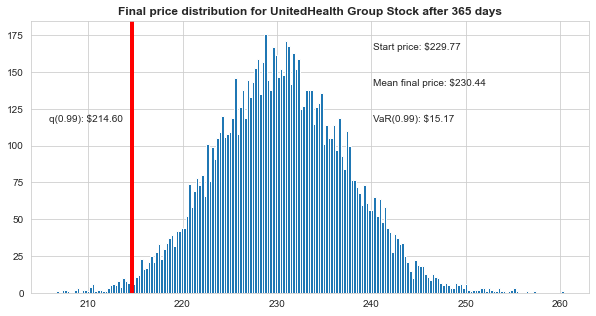

In [30]:
UNHq = np.percentile(UNH_simulations,1)

plt.figure(figsize=(10,5))
plt.hist(UNH_simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f" %UNH_start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % UNH_simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (UNH_start_price -UNHq,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % UNHq)
plt.axvline(x=UNHq, linewidth=4, color='r')
plt.title(u"Final price distribution for UnitedHealth Group Stock after %s days" %days, weight='bold')

In [31]:
print("The starting price that we had was $" + str(UNH_start_price)  
      + ". The average final price over 10,000 runs was $" + str(round(UNH_simulations.mean(),2)))
print("For every stock, we'd be risking $" + str(round((UNH_start_price -UNHq),2)) + " 99% of the time.")

The starting price that we had was $229.77. The average final price over 10,000 runs was $230.44
For every stock, we'd be risking $15.17 99% of the time.


### Predict Future Stock Prices

In [32]:
#Refresh data with 5 years instead of 1 for higher R2. 
start_date=end_date + relativedelta(years=-5)
#Using Yahoo Finance
for stock in stock_list:
    globals()[stock] = DataReader(stock,'yahoo',start_date,end_date)

In [33]:
HUMdataFrame = pd.DataFrame(HUM['Adj Close'])
ANTMdataFrame = pd.DataFrame(ANTM['Adj Close'])
UNHdataFrame = pd.DataFrame(UNH['Adj Close'])


In [34]:
future_days=30 #How many days do we want to predict?

In [35]:
print(HUMdataFrame.head())
print(ANTMdataFrame.head())
print(UNHdataFrame.head())

             Adj Close
Date                  
2015-09-21  182.385620
2015-09-22  182.202103
2015-09-23  182.231094
2015-09-24  179.613708
2015-09-25  174.958435
             Adj Close
Date                  
2015-09-21  139.171082
2015-09-22  138.324341
2015-09-23  138.901215
2015-09-24  136.835556
2015-09-25  132.043625
             Adj Close
Date                  
2015-09-21  114.473946
2015-09-22  113.541084
2015-09-23  113.864349
2015-09-24  111.841599
2015-09-25  107.482109


In [36]:
HUMdataFrame["Prediction"] = HUMdataFrame[['Adj Close']].shift(-future_days)
ANTMdataFrame["Prediction"] = ANTMdataFrame[['Adj Close']].shift(-future_days)
UNHdataFrame["Prediction"] = UNHdataFrame[['Adj Close']].shift(-future_days)


In [37]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
HUM_X = np.array(HUMdataFrame.drop(['Prediction'],1))
#Remove the last '30' rows
HUM_X = HUM_X[:-future_days]

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
ANTM_X = np.array(ANTMdataFrame.drop(['Prediction'],1))
#Remove the last '30' rows
ANTM_X = ANTM_X[:-future_days]

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
UNH_X = np.array(UNHdataFrame.drop(['Prediction'],1))
#Remove the last '30' rows
UNH_X = UNH_X[:-future_days]


In [38]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
HUM_y = np.array(HUMdataFrame['Prediction'])
# Get all of the y values except the last '30' rows
HUM_y =HUM_y[:-future_days]

### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
ANTM_y = np.array(ANTMdataFrame['Prediction'])
# Get all of the y values except the last '30' rows
ANTM_y =ANTM_y[:-future_days]

### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
UNH_y = np.array(UNHdataFrame['Prediction'])
# Get all of the y values except the last '30' rows
UNH_y =UNH_y[:-future_days]

In [39]:
# Split the data into 80% training and 20% testing
HUM_x_train, HUM_x_test, HUM_y_train, HUM_y_test = train_test_split(HUM_X, HUM_y, test_size=0.2)
ANTM_x_train, ANTM_x_test, ANTM_y_train, ANTM_y_test = train_test_split(ANTM_X, ANTM_y, test_size=0.2)
UNH_x_train, UNH_x_test, UNH_y_train, UNH_y_test = train_test_split(UNH_X, HUM_y, test_size=0.2)

In [40]:
# Create and train the Linear Regression  Model
HUM_lr = LinearRegression()
# Train the model
HUM_lr.fit(HUM_x_train, HUM_y_train)

# Create and train the Linear Regression  Model
ANTM_lr = LinearRegression()
# Train the model
ANTM_lr.fit(ANTM_x_train, ANTM_y_train)

# Create and train the Linear Regression  Model
UNH_lr = LinearRegression()
# Train the model
UNH_lr.fit(UNH_x_train, UNH_y_train)

LinearRegression()

In [41]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
HUM_lr_confidence = HUM_lr.score(HUM_x_test, HUM_y_test)
print("Humana lr confidence: ", HUM_lr_confidence)

ANTM_lr_confidence = ANTM_lr.score(ANTM_x_test, ANTM_y_test)
print("Anthem lr confidence: ", ANTM_lr_confidence)

UNH_lr_confidence = UNH_lr.score(UNH_x_test, UNH_y_test)
print("UnitedHealth Group lr confidence: ", UNH_lr_confidence)


Humana lr confidence:  0.8727589612089501
Anthem lr confidence:  0.9150816444066616
UnitedHealth Group lr confidence:  0.8437509734102813


In [42]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
HUM_x_forecast = np.array(HUMdataFrame.drop(['Prediction'],1))[-future_days:]

# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
ANTM_x_forecast = np.array(ANTMdataFrame.drop(['Prediction'],1))[-future_days:]

# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
UNH_x_forecast = np.array(UNHdataFrame.drop(['Prediction'],1))[-future_days:]

In [43]:
# Print linear regression model predictions for the next '30' days
HUM_lr_prediction = HUM_lr.predict(HUM_x_forecast)
ANTM_lr_prediction = ANTM_lr.predict(ANTM_x_forecast)
UNH_lr_prediction = UNH_lr.predict(UNH_x_forecast)

print("\nHumana Prediction - Next " + str(future_days) + " Days (Reverse Order)\n")
print(HUM_lr_prediction)
print("\nAnthem Prediction - Next " + str(future_days) + " Days (Reverse Order)\n")
print(ANTM_lr_prediction)
print("\nUnitedHealth Group Prediction - Next " + str(future_days) + " Days (Reverse Order)\n")
print(UNH_lr_prediction)




Humana Prediction - Next 30 Days (Reverse Order)

[419.30228229 415.44690135 419.59214726 419.05104633 421.48600049
 419.54384626 416.79968315 417.60166254 413.69798059 418.36501293
 406.08387967 405.8519877  403.81320199 407.40767498 407.9777624
 414.86717142 414.55796247 427.0419717  420.77098059 412.95397419
 405.39784627 408.15168138 393.80277591 391.86059219 403.7165705
 400.19938501 399.31044613 397.79341734 402.75031464 388.54634166]

Anthem Prediction - Next 30 Days (Reverse Order)

[276.29112154 277.66089739 280.2987144  279.51199257 280.34500382
 280.23391487 279.62308152 280.50232551 278.97519963 281.64076761
 276.57801394 274.08830609 268.2943609  272.34827152 274.83797937
 278.76229094 270.950688   277.32771557 274.57883795 273.85691565
 265.5177323  266.59520162 260.48335323 257.8732872  264.90468795
 259.84244451 263.06555489 262.48967247 263.59500615 252.71816727]

UnitedHealth Group Prediction - Next 30 Days (Reverse Order)

[383.74589421 379.9784662  387.11003971 386